In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('./Wholesale customers data.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
print(data.shape)
print(data.dtypes)

(440, 8)
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [44]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


C:\Users\ngsil\AppData\Local\Temp\ipykernel_18668\2075402265.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins = 20)
C:\Users\ngsil\AppData\Local\Temp\ipykernel_18668\2075402265.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins = 20)
C:\Users\ngsil\AppData\Local

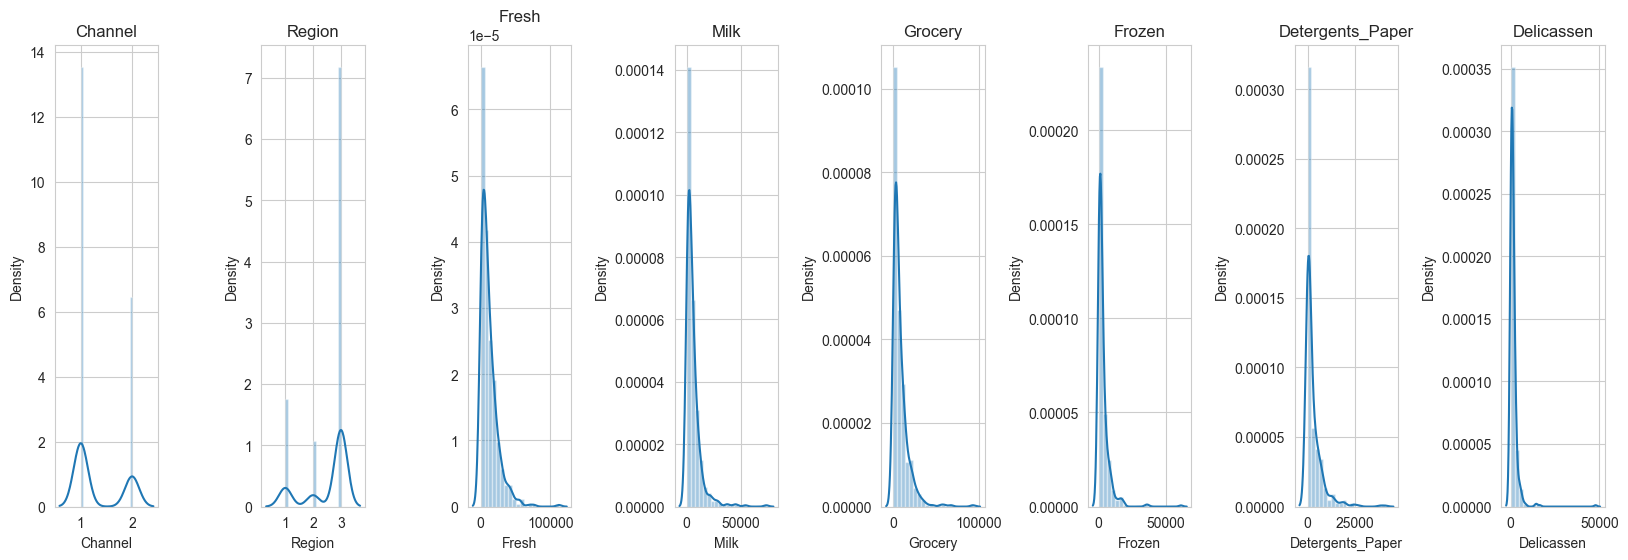

In [47]:
plt.figure(1 , figsize = (20 , 6))
n = 0
for x in data:
    n += 1
    plt.subplot(1 , 8 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(data[x] , bins = 20)
    plt.title(format(x))
plt.show()

In [32]:
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

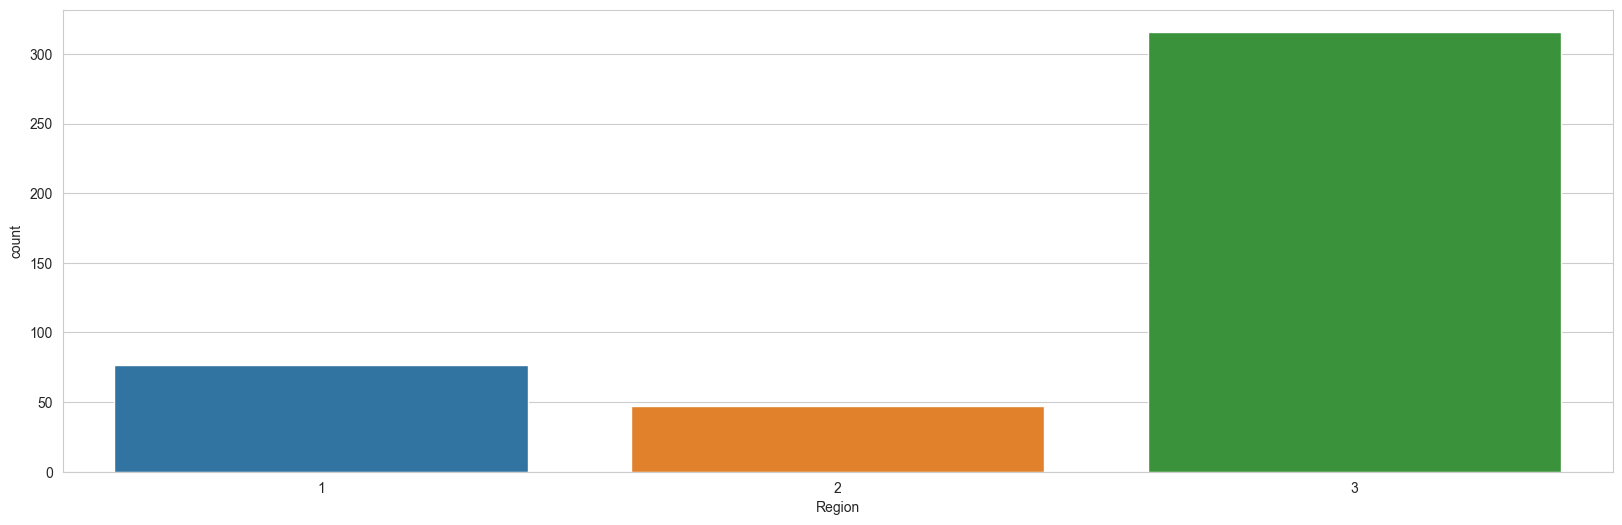

In [33]:
plt.figure(figsize=(20,6))
sns.countplot(x='Region', data=data)
plt.show()

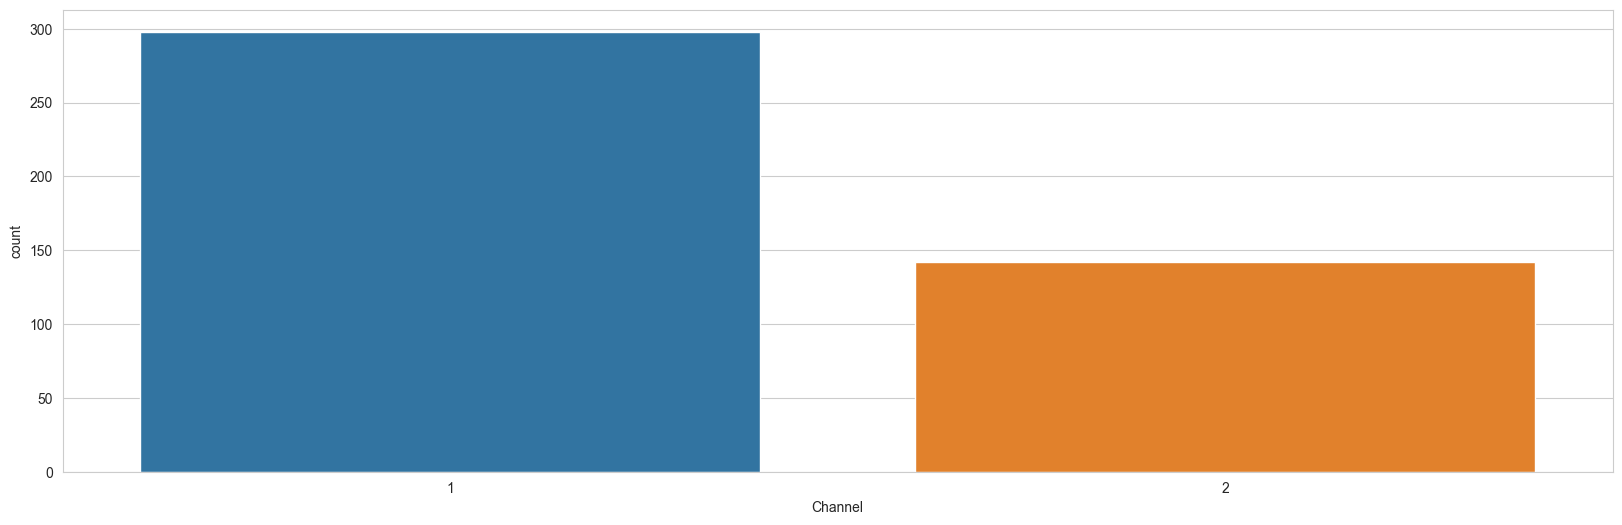

In [34]:
plt.figure(figsize=(20,6))
sns.countplot(x='Channel', data=data)
plt.show()

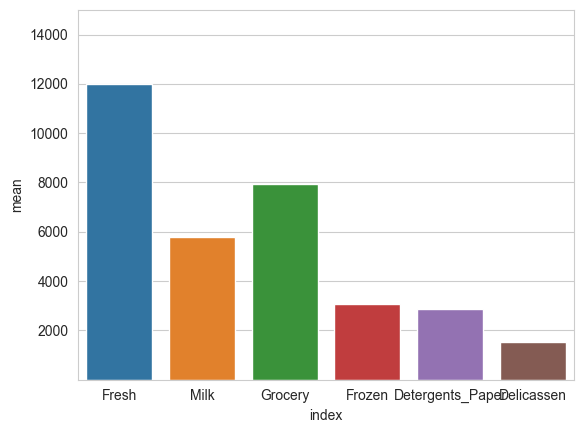

In [51]:
X_wholesales = data.iloc[:,2:8]
wholesales_means = X_wholesales.mean(axis = 0) #(6 x 1)
wholesales_means = wholesales_means.to_frame('mean')
wholesales_means.reset_index(level=0, inplace=True)
sns.barplot(x="index", y="mean", data=wholesales_means)
plt.ylim(1,15000)
plt.show()

Data preprocessing

In [52]:
X = data.iloc[:,2:8]

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(X)

print('Explained Variance Ratio: ' + str(pca.explained_variance_ratio_.cumsum()[1])) #phương sai từ ptu2

Explained Variance Ratio: 0.8647858849391101


K-Means

C:\Users\ngsil\OneDrive\Máy tính\lab2ttnt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ngsil\OneDrive\Máy tính\lab2ttnt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ngsil\OneDrive\Máy tính\lab2ttnt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ngsil\OneDrive\Máy tính\lab2ttnt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

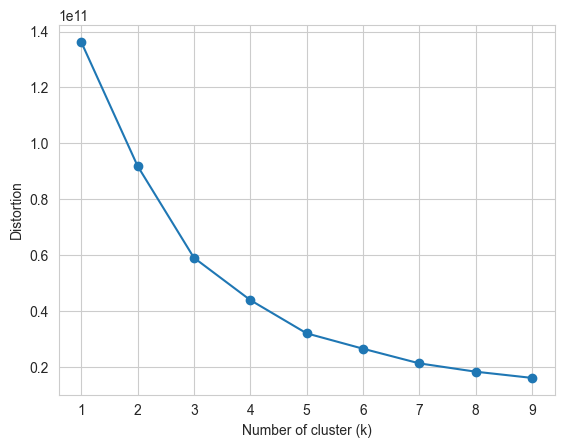

In [38]:
from sklearn.cluster import KMeans
import collections
from sklearn.metrics import silhouette_samples
from matplotlib import cm

distortions = []
K_to_try = range(1,10)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++', #khởi tạo tâm ban đầu
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)

plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Distortion')
plt.show()

C:\Users\ngsil\OneDrive\Máy tính\lab2ttnt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


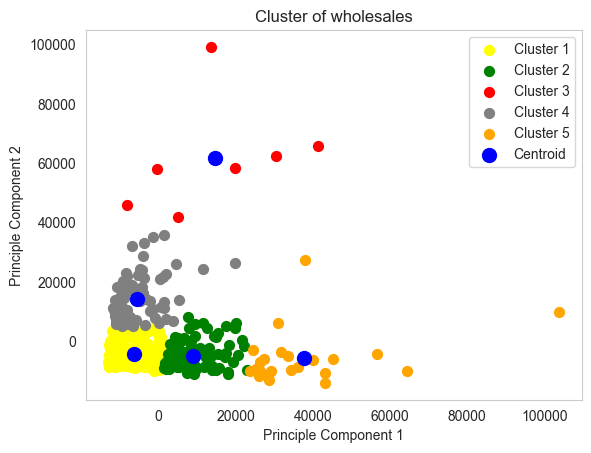

K Means Result: 
Counter({0: 227, 1: 103, 3: 80, 4: 23, 2: 7})


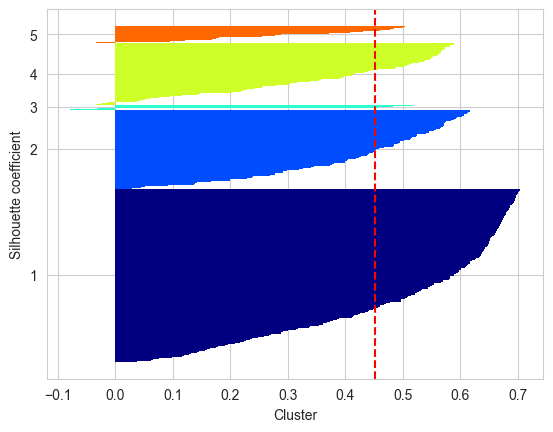

Silhouette coefficient:  0.45191162365144194
Final K Means Result (no PCA): 
Counter({4: 224, 2: 104, 0: 81, 1: 24, 3: 7})
Mean cluster 1: 7866.549382716049, STD: 2883.1790112175327
Mean cluster 2: 12735.46527777778, STD: 6762.824422460768
Mean cluster 3: 6194.520833333334, STD: 2000.2500595681329
Mean cluster 4: 24499.785714285714, STD: 6978.949626949791
Mean cluster 5: 3026.84375, STD: 1327.4900155165344


C:\Users\ngsil\OneDrive\Máy tính\lab2ttnt\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
model = KMeans(
    n_clusters=5,
    init='k-means++',
    #n_init=10,
    #max_iter=300,
    # n_jobs=-1,
    random_state=1)
model = model.fit(X_pca)
y = model.predict(X_pca)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], s = 50, c = 'grey', label = 'Cluster 4')
plt.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroid')
plt.title('Cluster of wholesales')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()

print('K Means Result: ')
print(collections.Counter(y))

# Silhouette
cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels): # i là chỉ số của cụm, c chứa gtri của cụm tại i
    c_silhouette_vals = silhouette_vals[y == c]  
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals) #giới hạn trục y 
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height = 1.0,
        edgecolor='none',
        color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.) #thêm mean 
    y_ax_lower += len(c_silhouette_vals) # tăng gtri trục x 
silhouette_avg = np.mean(silhouette_vals) # trung bình tất cả gtri sihou

plt.axvline(silhouette_avg, color="red", linestyle="--") #gtri tb sihou
plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Cluster')
plt.ylabel('Silhouette coefficient')
plt.show()
print('Silhouette coefficient: ', silhouette_avg)

# use best k form elbow
model_k = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    # n_init=10,
    # max_iter=300,
    # n_jobs=-1,
    random_state=1)

# fit with X instead of X_pca
model_k = model_k.fit(X)

y_final = model_k.predict(X)

print('Final K Means Result (no PCA): ')
print(collections.Counter(y_final))

y_final = pd.DataFrame(y_final, columns=['cluster'])

raw_result = pd.concat([X, y_final], axis = 1)

mean_1 = raw_result[raw_result['cluster'] == 0].iloc[:, 0:6].mean(axis = 1) #ax: dãy mean trong cụm 

mean_2 = raw_result[raw_result['cluster'] == 1].iloc[:, 0:6].mean(axis = 1)

mean_3 = raw_result[raw_result['cluster'] == 2].iloc[:, 0:6].mean(axis = 1)

mean_4 = raw_result[raw_result['cluster'] == 3].iloc[:, 0:6].mean(axis = 1)

mean_5 = raw_result[raw_result['cluster'] == 4].iloc[:, 0:6].mean(axis = 1)

print('Mean cluster 1: ' + str(mean_1.mean()) + ', STD: ' + str(mean_1.std())) #can2 phg sai var
print('Mean cluster 2: ' + str(mean_2.mean()) + ', STD: ' + str(mean_2.std()))
print('Mean cluster 3: ' + str(mean_3.mean()) + ', STD: ' + str(mean_3.std()))
print('Mean cluster 4: ' + str(mean_4.mean()) + ', STD: ' + str(mean_4.std()))
print('Mean cluster 5: ' + str(mean_5.mean()) + ', STD: ' + str(mean_5.std()))





    